#### Linear Regression

J = (wX + b) ^ 2

![LR Formula.png](https://raw.githubusercontent.com/vaibhaVishwakarma/ML-from-scratch/master/NoteBooks/LR%20Formula.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
class LinearRegression:
    def __init__(self ,lr = 10e-3 , n_iter = 10e2):
        self.weight = None
        self.bias = None
        self.lr = lr
        self.n_iter = int(n_iter)

    def fit(self , X: np.array, y: np.array):
        n_samples , n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):

            y_preds = np.dot(X,self.weight) + self.bias
            
            delweight_j = np.dot((2*X.T) , (y_preds - y )) / n_samples
            delbias_j = np.sum((2*(y_preds - y))) / n_samples

            self.weight = self.weight - (self.lr * delweight_j)
            self.bias   = self.bias   - (self.lr * delbias_j)
            
    def predict(self , X:np.array) -> np.array :
        return np.dot(X , self.weight) + self.bias
    
    def RMSE(self , y:np.array , y_preds:np.array) -> int :
        return np.sqrt(np.sum((y - y_preds)**2))
    
    def get_pred_lines(self , X):
        return X * self.weight + self.bias



In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
RANDOM_STATE = 500
SAMPLES = int(300)
FEATURES = 8
X , y = datasets.make_regression(n_samples=SAMPLES , n_features=FEATURES , noise = 50 , random_state=RANDOM_STATE)

X_train , X_test , y_train , y_test = train_test_split(X , y  , random_state=RANDOM_STATE , shuffle=True)


In [4]:
X_test.shape , y_test.shape

((75, 8), (75,))

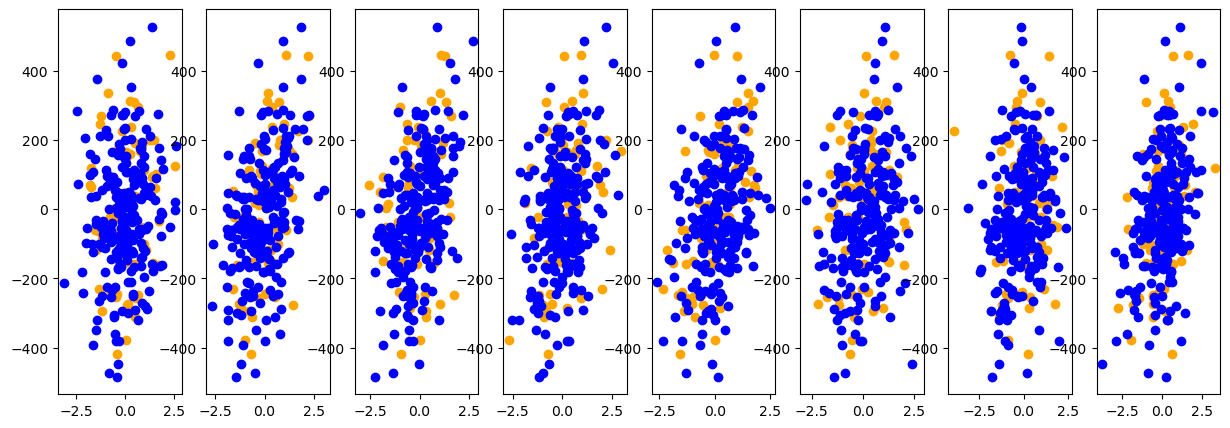

In [ ]:
FIGSIZE = (15,5)
fig , ax = plt.subplots(1 , FEATURES , figsize=FIGSIZE)
for i in range(FEATURES):
    ax[i].scatter(X_test[:,i] , y_test , color = "orange")
    ax[i].scatter(X_train[:,i] , y_train , color = "blue" )
plt.show() 

In [6]:
lr = LinearRegression(lr = 0.0001 , n_iter=10e3)
lr.fit(X_train , y_train)

In [7]:
y_preds = lr.predict(X_test)

In [8]:
lr_error = lr.RMSE(y_test ,  y_preds)

In [9]:
pred_lines = lr.get_pred_lines(X)

----IT CAN BE SEEN THAT THE MODEL MAY FAIL TO ALIGN WITH SOME FEATURES----


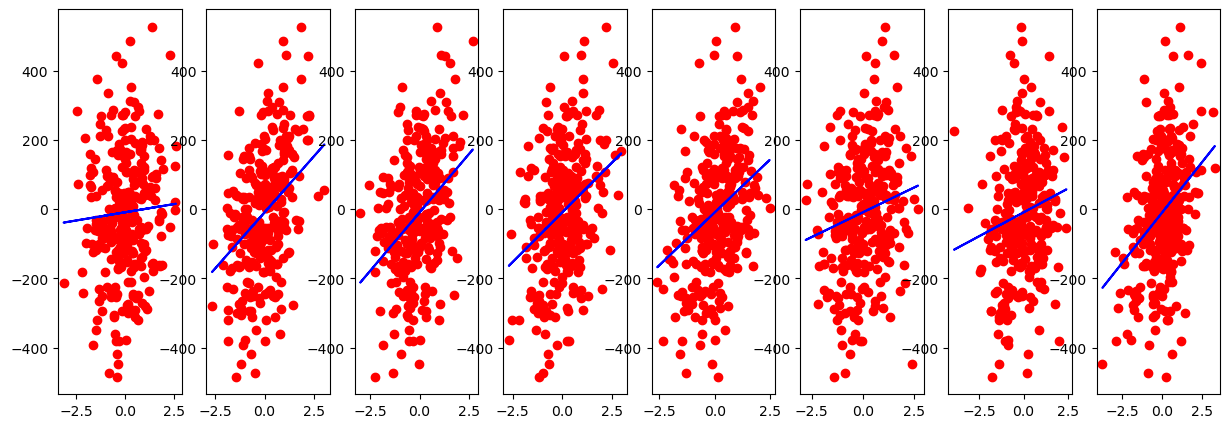

In [10]:
fig , ax = plt.subplots(1 , FEATURES , figsize=FIGSIZE)
for i in range(FEATURES):
    ax[i].scatter(X[:,i] , y , color = "red" )
    ax[i].plot(X[:,i] , pred_lines[:,i] , color = "blue" )
print("----IT CAN BE SEEN THAT THE MODEL MAY FAIL TO ALIGN WITH SOME FEATURES----")
plt.show()


In [11]:
from sklearn.linear_model import LinearRegression as SK_LinearRegression
sklr = SK_LinearRegression()

In [12]:
sklr.fit(X_train , y_train)

LinearRegression()

In [13]:
sk_pred = sklr.predict(X_test)
sk_lr_score = lr.RMSE(y_test , sk_pred)

In [14]:
print("custom model Error: " , lr_error , "\nsklearn model Error: ", sk_lr_score)

custom model Error:  630.840660922501 
sklearn model Error:  493.8075250896093


#### LOGISTIC REGRESSION
![LogR Formula.png](https://raw.githubusercontent.com/vaibhaVishwakarma/ML-from-scratch/master/NoteBooks/LogR%20Formula.png)

#### MultiClassification with logistic regression (One versus Rest)OVR
![alt text](https://raw.githubusercontent.com/vaibhaVishwakarma/ML-from-scratch/master/NoteBooks/OVR%20representation.png)

In [15]:
from sklearn.datasets import make_classification 
SAMPLES = int(1000)
X,y  =make_classification(n_samples=SAMPLES, n_features=100,n_classes= 4 ,n_clusters_per_class=3, n_informative=4) 
X_train , X_test , y_train , y_test = train_test_split(X , y  , random_state=RANDOM_STATE , shuffle=True)

In [16]:
class LogisticRegression:
    def __init__(self , lr = 10e-3 , n_iter = 10e2):
        self.lr = lr 
        self.n_iter = int(n_iter)
        self.weights = None 
        self.bias = None
        self.loss = None
        self.models = None
        self.n_classes = None

    @classmethod
    def crossEntropy(cls ,y , y_preds):
        n_samples = len(y)
        loss = - (np.dot(y.T,(np.log(y_preds)) + np.dot((1-y).T,np.log((1-y_preds))) )) / n_samples 
        return loss

    def fit(self , X , y):
        n_samples , n_features  = X.shape
        self.n_classes = len(set(y))
        self.weights = np.zeros((n_features, self.n_classes))
        self.bias = np.zeros(self.n_classes)
        loss_array = np.zeros((self.n_iter , self.n_classes))

        for nth_class in range(self.n_classes):

            weights = np.zeros(n_features)
            bias = 0
            loss = []

            y_aug = np.array(list(map(lambda x: 1 if x == nth_class else 0 , y)))

            for _ in range(self.n_iter):

                z = np.dot(X , weights) + bias

                y_preds = 1 / (1 + np.exp(-z))
                loss.append( self.crossEntropy(y_aug , y_preds))

                delw_j = np.dot(X.T, (y_preds - y_aug)) / n_samples
                delb_j = np.sum(y_preds - y_aug) / n_samples

                weights -= self.lr * delw_j
                bias    -= self.lr * delb_j

            loss_array[: , nth_class] = loss

            self.weights[: , nth_class] = weights
            self.bias[nth_class] = bias   
        self.loss = list(map(lambda record : record.mean() , loss_array))         
            
    def predict_proba(self, X):
        n_records = X.shape[0]
        result = np.zeros((n_records, self.n_classes))
        for nth_class in range(self.n_classes):
            z = np.dot(X , self.weights[: , nth_class]) + self.bias[nth_class]
            result[: , nth_class] = 1 / (1 + np.exp(-z))
        return result
    
    def predict(self , X):
        n_records = X.shape[0]
        result = np.zeros((n_records, self.n_classes))
        for nth_class in range(self.n_classes):
            z = np.dot(X , self.weights[: , nth_class]) + self.bias[nth_class]
            result[: , nth_class] = 1 / (1 + np.exp(-z))

        #softmax
        intermediate = np.exp(result)
        denominator  = np.array(list(map( lambda record : record.sum(), intermediate)))
        proba = intermediate / denominator[:,np.newaxis]
        return np.array(list(map(lambda record : list(record).index(max(record)) , proba)))       
    

In [17]:
logr = LogisticRegression()
logr.fit(X_train , y_train) 

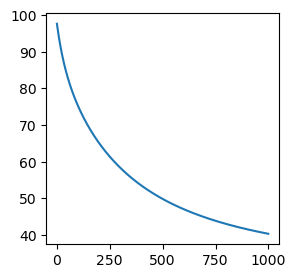

In [18]:
plt.figure(figsize=(3,3))
plt.plot([i for i in range(logr.n_iter)] , logr.loss)
plt.show()

In [19]:
y_preds = logr.predict(X_test)
y_preds,y_test

(array([0, 1, 3, 3, 0, 0, 2, 1, 3, 0, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1,
        0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 1, 0, 2, 3, 1, 2, 1, 1, 0, 1, 2,
        1, 0, 3, 1, 2, 1, 0, 2, 3, 1, 1, 2, 0, 0, 1, 3, 1, 0, 3, 0, 2, 1,
        0, 1, 2, 0, 0, 3, 2, 1, 3, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 1, 1,
        0, 0, 1, 2, 0, 3, 0, 0, 1, 2, 0, 1, 1, 3, 0, 1, 1, 2, 0, 2, 0, 0,
        2, 1, 0, 1, 0, 2, 2, 1, 2, 3, 2, 3, 2, 1, 0, 0, 2, 0, 1, 3, 1, 2,
        0, 1, 0, 2, 3, 3, 0, 0, 1, 2, 3, 1, 0, 2, 1, 2, 1, 2, 1, 2, 3, 0,
        2, 3, 1, 3, 3, 1, 0, 3, 3, 2, 1, 3, 0, 2, 3, 0, 0, 2, 0, 1, 3, 1,
        1, 3, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 3, 1, 1, 1, 2, 3, 3, 2, 1, 3,
        0, 2, 2, 0, 1, 2, 1, 2, 3, 2, 3, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 3, 2, 3, 2, 1, 2, 2, 2, 1, 1,
        1, 2, 0, 1, 2, 0, 2, 1]),
 array([0, 1, 2, 1, 2, 0, 3, 1, 3, 3, 1, 3, 1, 2, 0, 3, 0, 3, 2, 1, 0, 0,
        2, 1, 3, 1, 1, 2, 0, 2, 0, 3, 0, 3, 0, 2, 2, 3, 3, 1, 3, 0, 1, 3,
    

In [20]:
confusion_matrix(y_test , y_preds)

array([[40, 12, 10,  6],
       [ 3, 42,  8, 10],
       [11,  9, 26, 12],
       [11, 23, 19,  8]], dtype=int64)

In [21]:
temp = (y_preds + y_test)
wrongs_logr = 100*np.count_nonzero(temp[temp == 1])/len(y_test)
wrongs_logr

6.0

In [22]:
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression

sk_logr = sk_LogisticRegression(multi_class='ovr')
sk_logr.fit(X , y)

C:\Users\vaibh\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [23]:
sk_pred = sk_logr.predict(X_test)
temp = (sk_pred + y_test)
wrongs_sk_logr = 100*np.count_nonzero(temp[temp == 1])/len(y_test)

In [24]:
confusion_matrix(y_test , sk_pred)

array([[46,  8, 10,  4],
       [ 3, 40,  8, 12],
       [12,  6, 33,  7],
       [ 8, 13, 15, 25]], dtype=int64)

In [25]:
print(f"Custom Logistic Regression (OVR)  - accuracy: {round(100-wrongs_logr,3)}")
print(f"Sklearn Logistic Regression (OVR) - accuracy: {round(100-wrongs_sk_logr,3)}")

Custom Logistic Regression (OVR)  - accuracy: 94.0
Sklearn Logistic Regression (OVR) - accuracy: 95.6


In [26]:
(sk_logr.predict_proba(X) - logr.predict_proba(X)).sum(axis = 0)

array([-58.82986283, -61.79992671, -37.7140221 , -36.79011179])

#### Conclusion
- difference in predict probobability 
-  * sklearn library has modified version of the logistic regression , with modification in training leading to better scores
-  both models are compareable to much extent... [hats off to the contibuters of sklearn]
- there are better techniques to classify multi_class classification then ovr implementation in sklearn ie liblinear(Large Linear classifier) , lbfgs(Limited-memory BFGS)